## Gagan Chordia

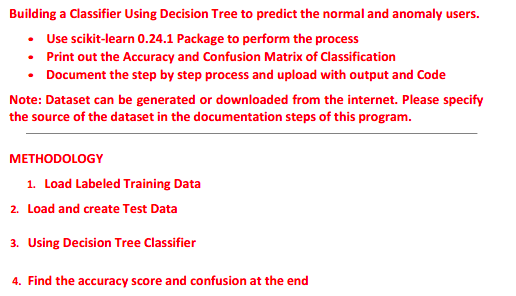

Dataset: [https://www.kaggle.com/hassan06/nslkdd?select=KDDTrain%2B_20Percent.arff](https://www.kaggle.com/hassan06/nslkdd?select=KDDTrain%2B_20Percent.arff)

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame(arff.loadarff('KDDTrain+_20Percent.arff')[0])

le = LabelEncoder()

df['class'] = le.fit_transform(df['class'])
df['protocol_type'] = le.fit_transform(df['protocol_type'])
df['service'] = le.fit_transform(df['service'])
df['flag'] = le.fit_transform(df['flag'])
df['land'] = le.fit_transform(df['land'])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,1,19,9,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0.0,2,41,9,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0.0,1,46,5,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0.0,1,22,9,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0.0,1,22,9,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [3]:
y = df['class']
x = df.drop('class', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=20, test_size=.35)

In [4]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [5]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9941029711952823


In [6]:
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[4036   19]
 [  33 4730]]


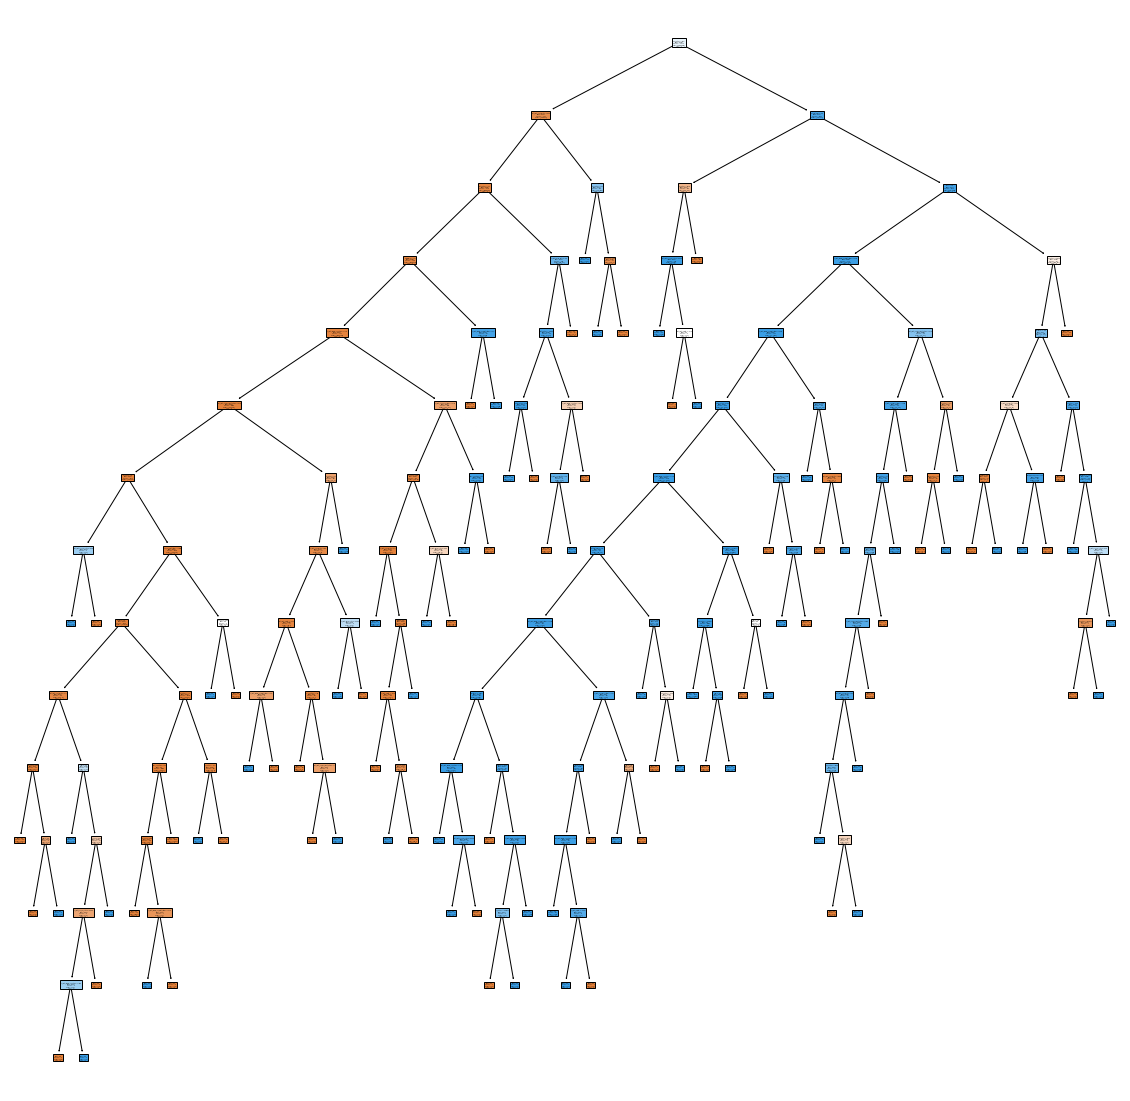

In [7]:
plt.figure(figsize=(20, 20))
plot_tree(model, feature_names=x.columns.tolist(), class_names=['0', '1'], filled=True)
plt.show()